## Ipotesi di Mercato Efficiente e Struttura Temporale

L’**ipotesi di mercato efficiente** afferma che il prezzo di un titolo incorpora già tutte le informazioni pubblicamente disponibili sul futuro (Fama, 1970). Da ciò deriva che ha senso modellare una sequenza di prezzi come un **random walk** (Malkiel, 1973) o, in modo equivalente, modellare i rendimenti come una sequenza di variabili casuali **i.i.d.** (indipendenti e identicamente distribuite), come esplorato nel Capitolo 3. Questo è un modello ampiamente adottato da professionisti e accademici.

Tuttavia, un'altra corrente di pensiero sostiene esattamente il contrario, a favore di mercati **inefficienti e irrazionali** (Shiller, 1981), secondo la cosiddetta **finanza comportamentale** (*behavioral finance*, Shiller, 2003). In effetti, è innegabile che i dati finanziari mostrino una certa **struttura temporale** che potrebbe essere potenzialmente modellata e sfruttata (Lo e Mackinlay, 2002). Uno degli aspetti strutturali più evidenti è il **volatility clustering** (descritto nel Capitolo 2).

Questo capitolo esamina Ipotesi di Mercato la struttura temporale delle serie storiche finanziarie sotto forma di:

- **Modelli per la media**
- **Modelli per la varianza (o volatilità)**

con un'enfasi particolare sul **filtro di Kalman**.

## Struttura Temporale nei Dati Finanziari

Dall'analisi esplorativa dei dati finanziari e dai fatti stilizzati nel Capitolo 2, si può scegliere di assumere il modello i.i.d., come approfondito nel Capitolo 3, oppure cercare di incorporare una certa **struttura temporale** nel modello, come si tenta in questo capitolo.

Il modello i.i.d. può essere giustificato dall'**ipotesi di mercato efficiente** di Fama (Fama, 1970), secondo cui non è possibile prevedere i prezzi futuri poiché il prezzo di un titolo incorpora già tutte le informazioni pubblicamente disponibili. D'altra parte, una linea di pensiero altrettanto popolare in finanza sostiene l'esistenza di **mercati inefficienti e irrazionali** (Shiller, 1981), secondo la **finanza comportamentale** (Shiller, 2003).  
Secondo questa visione, il mercato è in parte prevedibile e potrebbe muoversi secondo **trend**, per cui lo studio dei prezzi passati può essere utile per prevedere la direzione futura dei prezzi.

Pertanto, invece di assumere il modello del **random walk** (Malkiel, 1973), ci concentreremo su **modelli non random walk** (Lo e Mackinlay, 2002). Supponiamo di avere $N$ titoli o asset negoziabili e indichiamo con $x_t \in \mathbb{R}^N$ i rendimenti casuali degli asset al tempo $t$.
Invece di usare il modello i.i.d. per i rendimenti,  $x_t = \mu + \epsilon_t$ come nella (3.1), passeremo ora a un modello più generale in cui i rendimenti $x_t$ sono modellati **condizionatamente alle osservazioni passate**, denotate da $\mathcal{F}_{t-1} \triangleq \{ \dots, x_{t-2}, x_{t-1} \}$, e scriveremo:

$$
\begin{equation}
  x_t = mu_t + \epsilon_t
\end{equation}
$$

dove $\mu_t \in \mathbb{R}^N$ è il **rendimento atteso condizionato** al tempo $t$.

$$
\mu_t = E\left[x_t \mid \mathcal{F}_{t-1}\right]
$$

dove  $\epsilon_t \in \mathbb{R}^N$  rappresenta l'**errore del modello** (detto anche *innovazione* o *residuo*) con media nulla e **matrice di covarianza condizionata**  $\Sigma_t = \mathbb{E}[(x_t - \mu_t)(x_t - \mu_t)^T \mid \mathcal{F}_{t-1}]$.

Il modello i.i.d. della (3.1) nel Capitolo 3 può essere ottenuto con la scelta particolare $\mu_t = \mu$ e  $\Sigma_t = \Sigma$,  che rimangono fissi nel tempo.

La modellazione dei rendimenti $x_t$ condizionati ai dati storici $\mathcal{F}_{t-1}$ è proprio uno degli obiettivi dell'**econometria**, che integra modelli statistici e matematici per formulare teorie o testare ipotesi esistenti in economia, oltre a prevedere tendenze future basate sui dati storici.

La Figura 4.1 mostra un esempio di **serie temporale univariata sintetica AR(1)** gaussiana (modello descritto più avanti), in cui si può osservare una certa struttura temporale.



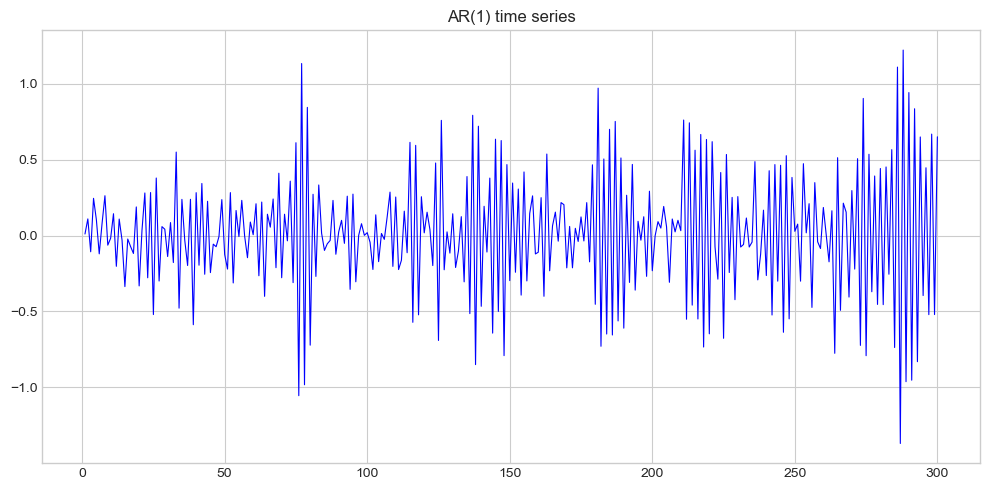

In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Specify an AR(1) model with given coefficients and parameters
np.random.seed(42)
T = 300
mu = 0.01
phi = -0.9
sigma = 0.2

# Simulate one path
x = np.zeros(T)
x[0] = mu
for t in range(1, T):
    x[t] = mu + phi * (x[t-1] - mu) + sigma * np.random.normal()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, T+1), x, linewidth=0.8, color='blue')
plt.title('AR(1) time series')
plt.tight_layout()
plt.show()

## Riferimenti e Approccio del Capitolo

Alcuni libri di testo accessibili che trattano la modellazione dei dati finanziari includono **Tsay (2010)** e **Ruppert e Matteson (2015)**, con un’enfasi maggiore sul caso multivariato in **Lütkepohl (2007)** e **Tsay (2013)**. Sono inoltre disponibili alcune eccellenti rassegne, come **Bollerslev et al. (1992)**, **Taylor (1994)** e **Poon e Granger (2003)**.

Questo capitolo si discosta leggermente dagli approcci convenzionali della modellistica econometrica, che tipicamente ruotano attorno a modelli autoregressivi e modelli di volatilità “**GARCH**”. Invece, l’enfasi è posta sulla **semplicità dei modelli** combinata con la versatilità del **filtro di Kalman** (spesso sottoutilizzato nella letteratura finanziaria, sebbene trattato in **Tsay (2010)** e **Lütkepohl (2007)**).

Inoltre, viene data particolare attenzione alla **modellazione della volatilità stocastica**, che spesso non riceve l’attenzione che merita rispetto ai più popolari modelli “GARCH”.

Dopo l'introduzione al filtro di Kalman nella Sezione 4.2, verranno presentate due famiglie di modelli:

- **Modelli per la media**: per il rendimento atteso condizionato  
  $\mu_t = \mathbb{E}[x_t \mid \mathcal{F}_{t-1}]$  
  trattati nella Sezione 4.3;

- **Modelli per la varianza**: per la matrice di covarianza condizionata  
  $\Sigma_t = \mathbb{E}[(x_t - \mu_t)(x_t - \mu_t)^T \mid \mathcal{F}_{t-1}]$  
  trattati nella Sezione 4.4.

# Filtro di Kalman

La modellazione nello spazio degli stati fornisce un quadro unificato per affrontare un'ampia gamma di problemi nell'analisi delle serie temporali. Può essere considerata un approccio universale e flessibile alla modellazione, dotato di un algoritmo molto efficiente: il **filtro di Kalman**.  
L'idea di base è assumere che l'evoluzione del sistema nel tempo sia guidata da una serie di valori non osservabili o nascosti, che possono essere misurati solo indirettamente attraverso le osservazioni dell'output del sistema.  
Questa modellazione può essere utilizzata per **filtraggio**, **levigatura** e **previsione**.

### Origini e Riferimenti

Il filtro di Kalman prende il nome da *Rudolf E. Kalman*, uno dei principali sviluppatori della teoria (Kalman, 1960).  
Talvolta è chiamato **filtro di Kalman–Bucy** o anche **filtro di Stratonovich–Kalman–Bucy**, poiché *Richard S. Bucy* contribuì anch'egli alla teoria e *Ruslan Stratonovich* propose in precedenza una versione non lineare più generale.  
Tra i riferimenti classici più completi e autorevoli sui modelli nello spazio degli stati e sul filtro di Kalman si annoverano:

- Anderson e Moore (1979)
- Durbin e Koopman (2012)
- Brockwell e Davis (2002)
- Shumway e Stoffer (2017)
- A. Harvey (1989)
- Zivot et al. (2004)
- Tsay (2010)
- Lütkepohl (2007)
- A. Harvey e Koopman (2009)

### Applicazioni

Il filtro di Kalman, impiegato dalla **NASA** negli anni '60 nel programma **Apollo**, vanta oggi una vasta gamma di applicazioni tecnologiche.  
È comunemente utilizzato nella **guida**, **navigazione** e **controllo** di veicoli, inclusi aerei, navicelle spaziali e imbarcazioni.  
Ha trovato applicazioni anche in:

- Analisi delle serie temporali
- Elaborazione dei segnali
- Econometria
- Pianificazione e controllo del movimento robotico
- Ottimizzazione delle traiettorie

### Implementazioni Software

Attualmente, l'implementazione software del filtro di Kalman è ampiamente diffusa.  
Sono disponibili numerose librerie nella maggior parte dei linguaggi di programmazione.

## Modello nello Spazio degli Stati

Matematicamente, il filtro di Kalman si basa sul seguente modello lineare gaussiano nello spazio degli stati con tempo discreto $t = 1, \dots, T$ (Durbin e Koopman, 2012):

$$
\begin{equation}
  \qquad\qquad
  \begin{aligned}
      y_t          &= Z \alpha_t + \epsilon_t\\
      \alpha_{t+1} &= T \alpha_t + \eta_t
  \end{aligned}
  \quad
  \begin{aligned}
  & \text{(observation equation)},\\
  & \text{(state equation)},
  \end{aligned}
\end{equation}
$$

Dove $y_t$ rappresenta le osservazioni nel tempo con matrice di osservazione $Z$, $\alpha_t$ rappresenta lo stato interno non osservato o nascosto con matrice di transizione dello stato $T$, e i due termini di rumore $\varepsilon_t$ e $\eta_t$ sono distribuiti secondo una gaussiana a media zero e con matrici di covarianza rispettivamente $H$ e $Q$, ovvero:  
$\varepsilon_t \sim \mathcal{N}(0, H)$ e $\eta_t \sim \mathcal{N}(0, Q)$.  
Lo stato iniziale può essere modellato come $\alpha_1 \sim \mathcal{N}(a_1, P_1)$.  
Implementazioni software mature ed efficienti del modello (4.2) sono facilmente disponibili, ad esempio Helske (2017).

Vale la pena menzionare che un'alternativa notazionale diffusa in letteratura per il modello nello spazio degli stati (4.2) consiste nello spostare l'indice temporale nell'equazione di stato di un'unità:  
$\alpha_t = T \alpha_{t-1} + \eta_t$.  
Questo cambiamento ha solo un effetto marginale sul punto iniziale del sistema, che ora è $\alpha_0$ (corrispondente al tempo precedente alla prima osservazione) invece di $\alpha_1$ (corrispondente allo stesso tempo della prima osservazione); a parte ciò, si tratta solo di una preferenza notazionale.

I parametri del modello nello spazio degli stati (4.2) (cioè $Z$, $T$, $H$, $Q$, $a_1$ e $P_1$) possono essere forniti dall'utente (se noti). In caso contrario, possono essere stimati dai dati tramite algoritmi basati sulla massima verosimiglianza. Anche in questo caso, sono disponibili implementazioni software mature ed efficienti per l'adattamento dei parametri (Holmes et al., 2012).

Per costruire un po' di intuizione sui modelli nello spazio degli stati, consideriamo un esempio semplice ma illustrativo.


### Esempio (Tracciamento tramite modello nello spazio degli stati)

Supponiamo di voler tracciare un oggetto in una dimensione nel tempo, $x_t$, a partire da misurazioni rumorose $y_t = x_t + \varepsilon_t$ rilevate a intervalli temporali $\Delta t$.  
Presentiamo quattro diversi modi per modellare questo sistema, dal più semplice al più avanzato, basati sul modello nello spazio degli stati.

Se definiamo lo stato interno semplicemente come la posizione, $\alpha_t = x_t$, allora il modello (4.2) diventa semplicemente:

$$
\begin{aligned}
y_t &= x_t + \varepsilon_t, \\
x_{t+1} &= x_t + \eta_t,
\end{aligned}
$$

dove si assume implicitamente che la posizione $x_t$ non cambi molto nel tempo.

Se ora includiamo la velocità $v_t$ nello stato interno, $\alpha_t = \begin{bmatrix} x_t \\ v_t \end{bmatrix}$, allora il modello nello spazio degli stati diventa:

$$
\begin{aligned}
  y_t &= \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} x_t\\ v_t \end{bmatrix} + \epsilon_t,\\
  \begin{bmatrix} x_{t+1}\\ v_{t+1} \end{bmatrix} &= \begin{bmatrix} 1 & \Delta t\\ 0 & 1 \end{bmatrix} \begin{bmatrix} x_t\\ v_t \end{bmatrix} + \eta_t,
\end{aligned}
$$

dove $\eta_t$ rappresenta il rumore di processo, e si assume che la posizione cambi nel tempo in funzione della velocità.

Se includiamo anche l'accelerazione $a_t$ nello stato interno, $\alpha_t = \begin{bmatrix} x_t \\ v_t \\ a_t \end{bmatrix}$, otteniamo il seguente modello nello spazio degli stati:

$$
y_t = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}
\begin{bmatrix} x_t \\ v_t \\ a_t \end{bmatrix} + \varepsilon_t,
$$

$$
\begin{bmatrix} x_{t+1} \\ v_{t+1} \\ a_{t+1} \end{bmatrix} =
\begin{bmatrix}
1 & \Delta t & 0 \\
0 & 1 & \Delta t \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix} x_t \\ v_t \\ a_t \end{bmatrix} + \eta_t.
$$

Infine, possiamo migliorare ulteriormente il modello, specialmente se la frequenza di campionamento non è sufficientemente alta, includendo l'accelerazione anche nell'equazione della posizione:

$$
x_{t+1} = x_t + \Delta t \cdot v_t + \frac{1}{2} \Delta t^2 \cdot a_t,
$$

che porta al modello:

$$
y_t = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}
\begin{bmatrix} x_t \\ v_t \\ a_t \end{bmatrix} + \varepsilon_t,
$$

$$
\begin{bmatrix} x_{t+1} \\ v_{t+1} \\ a_{t+1} \end{bmatrix} =
\begin{bmatrix}
1 & \Delta t & \frac{1}{2} \Delta t^2 \\
0 & 1 & \Delta t \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix} x_t \\ v_t \\ a_t \end{bmatrix} + \eta_t.
$$

È importante sottolineare che il modello nello spazio degli stati descritto in (4.2) non è il più generale possibile.  
Un'estensione banale consiste nel permettere ai parametri $Z$, $T$, $H$ e $Q$ di variare nel tempo, diventando $Z_t$, $T_t$, $H_t$ e $Q_t$.

Più in generale, si possono rilassare le due ipotesi chiave del modello (4.2):

1. consentendo funzioni **non lineari** di $\alpha_t$ (invece delle funzioni lineari $Z \alpha_t$ e $T \alpha_t$), e  
2. **non assumendo** che le distribuzioni del rumore siano gaussiane.

Queste generalizzazioni portano a estensioni proposte in letteratura, come:

- il **filtro di Kalman esteso** (Extended Kalman Filter),
- il **filtro di Kalman unscented** (Unscented Kalman Filter),
- e il più generale (ma anche più oneroso dal punto di vista computazionale) **filtro particellare** (Particle Filtering)  
  (Durbin e Koopman, 2012).


## Filtro e Smoothing di Kalman

Il filtro di Kalman è un algoritmo estremamente efficiente per risolvere in modo ottimale il modello nello spazio degli stati (equazione 4.2), che è lineare e assume distribuzioni gaussiane per i termini di rumore. Il suo costo computazionale è così contenuto che fu utilizzato persino nel programma Apollo della NASA negli anni '60: è notevole il fatto che potesse essere implementato in un computer rudimentale e minuscolo (2 KB di RAM a nucleo magnetico, 36 KB di memoria ROM a corda magnetica, CPU costruita con circuiti integrati e una frequenza di clock inferiore a 100 kHz).

L'obiettivo del filtro di Kalman è caratterizzare la distribuzione dello stato nascosto al tempo $t$, $\alpha_t$, date le osservazioni fino (e incluse) al $t$, cioè in modo causale. Poiché la distribuzione dei termini di rumore è gaussiana, ne consegue che anche la distribuzione condizionata di $\alpha_t$ è gaussiana; pertanto, è sufficiente caratterizzarne la **media condizionata** e la **matrice di covarianza condizionata**.

$$
\begin{aligned}
  a_{t\mid T} &\triangleq E\left[\alpha_t \mid (y_1,\dots,y_T)\right],\\
  P_{t\mid T} &\triangleq \text{Cov}\left[\alpha_t \mid (y_1,\dots,y_T)\right].
\end{aligned}
$$


## Smoothing di Kalman e confronto con il Filtering

È interessante notare che queste quantità possono anche essere calcolate in modo efficiente utilizzando un algoritmo di "passaggio all’indietro" (*backward pass*) che va da $t = T$ a $t = 1$ (Durbin e Koopman, 2012). Poiché questo richiede tutte le osservazioni, si tratta naturalmente di un algoritmo di tipo **batch-processing**, piuttosto che online.

Nel complesso, la caratterizzazione completa degli stati nascosti esegue in modo molto efficiente sia il passaggio in avanti (*forward*) che quello all'indietro (*backward*). La scelta tra **filtering** e **smoothing** dipende dal fatto che l'applicazione richieda un approccio causale (in tempo reale) oppure non causale (batch). Ovviamente, la caratterizzazione dello stato nascosto tramite smoothing è molto più accurata rispetto al filtering, poiché utilizza un maggior numero di informazioni.

La Figura 4.2 mostra il risultato del filtro di Kalman e dello smoothing di Kalman per i quattro diversi modelli nello spazio degli stati dell’Esempio 4.1 (adattando opportunamente le varianze dei termini di rumore tramite massima verosimiglianza). In generale, quanto più accurato è il modello, tanto migliori sono le prestazioni. In questo esempio specifico, tuttavia, le differenze sono minime. D'altra parte, lo smoothing di Kalman supera significativamente il filtering, poiché ha accesso simultaneo a tutte le osservazioni.

![kalman](./images/kalman-tracking-example-1.png)

### Modellazione della media

In econometria, siamo interessati a prevedere i valori futuri di una serie storica finanziaria a partire dalle osservazioni passate. Una prima scelta che dobbiamo compiere è se concentrarci sulla serie storica dei **prezzi** o su quella dei **rendimenti**.

Naturalmente, le due serie sono banalmente collegate tra loro, ma non è chiaro a priori quale delle due sia più gestibile:

- I **rendimenti** tendono ad essere più costanti e sono più facili da modellare,
- mentre i **prezzi** tendono a presentare un **trend**.

Ricordiamo che i **log-prezzi** sono indicati come: $y_t = \log(p_t)$ e i **log-rendimenti** come: $x_t = y_t - y_{t-1}$
(vedi Capitolo 3 per il modello del **random walk**).

Salvo diversa indicazione, ci concentreremo sul **caso univariato** (singolo asset) per semplicità. In effetti, nella maggior parte dei casi pratici, il caso multivariato può essere trattato **asset per asset**.

L'obiettivo è quindi quello di **calcolare l'aspettativa del valore futuro** della serie temporale al tempo $t$, basandosi sulle osservazioni passate $\mathcal{F}_{t-1}$, con la speranza di estrarre **informazioni strutturali**, ovvero:

- $\mathbb{E}[y_t \mid \mathcal{F}_{t-1}]$ per i **log-prezzi**, oppure  
- $\mathbb{E}[x_t \mid \mathcal{F}_{t-1}]$ per i **log-rendimenti**.

I lettori dovrebbero essere consapevoli del fatto che **potrebbe non esserci alcuna informazione strutturale temporale significativa da sfruttare**. In tali casi, il **modello i.i.d.** (indipendente e identicamente distribuito) presentato nel Capitolo 3 sarebbe sufficiente.

In effetti, ciò è in parte supportato dall'**analisi esplorativa dei dati** nella Sezione 2.4 del Capitolo 2, dove l'**autocorrelazione dei rendimenti** risulta essere **insignificante**.

In ultima analisi, ciò dipende dalla **natura dei dati** e, in particolare, dalla **frequenza delle osservazioni**.


## Media Mobile (MA)

Ispirandosi al modello i.i.d. per i rendimenti  $x_t = \mu + \varepsilon_t$  
(visto nell'equazione 3.1), il modo più semplice per stimare $\mu$ è **calcolare la media di diverse osservazioni**, al fine di ridurre l'effetto del rumore o della componente di innovazione $\varepsilon_t$.

La **media mobile (MA)** di ordine $q$, indicata come MA($q$), è definita come:

$
\hat{x}_t = \frac{1}{q} \sum_{i=1}^{q} x_{t-i}
\tag{4.3}
$

dove $q$ rappresenta il **lookback**, ovvero la quantità di dati da mediare. Poiché questa media campionaria viene calcolata per ogni valore di $t$ su una **finestra mobile**, è anche comunemente chiamata **media mobile** o **rolling mean**.

Una variante **non causale** (utile per il livellamento ma non per la previsione) considera una versione **centrata** della media mobile, utilizzando campioni passati e futuri attorno a $x_t$.

### Interpretazione sotto il modello i.i.d.

Sotto il modello i.i.d. $x_t = \mu + \varepsilon_t$, la media mobile stima $\mu$ mediando il rumore:

$
\hat{x}_t = \mu + \frac{1}{q} \sum_{i=1}^{q} \varepsilon_{t-i}
$

dove la **varianza** della componente di rumore mediata è **ridotta di un fattore $q$**. Se invece $\mu_t$ è **variabile nel tempo**, la media mobile serve ad **approssimare questo valore lentamente variabile**.

### Media Mobile sui Log-Rendimenti e Log-Prezzi

È interessante interpretare la media mobile sui log-rendimenti dal punto di vista dei log-prezzi. Usando  
$x_t = y_t - y_{t-1}$,  
la media mobile in (4.3) può essere riscritta come:

$$
\hat{x}_t = \frac{1}{q} (y_{t-1} - y_{t-q-1})
$$

Questo mostra che si sta **calcolando il trend dei log-prezzi sotto forma di pendenza**.

In alternativa, si può applicare l’operazione di media mobile direttamente sui log-prezzi:

$$
\hat{y}_t = \frac{1}{q} \sum_{i=1}^{q} y_{t-i}
\tag{4.4}
$$

Questa tecnica è ampiamente utilizzata nel contesto del **“charting”** o dell’**analisi tecnica** (Malkiel, 1973), dove viene tipicamente applicata direttamente ai **prezzi $p_t$** (senza operazione di log). Tuttavia, **non sembra avere una solida base matematica**, se non per l’interpretazione visiva di "livellamento" della serie temporale rumorosa.

### Confronto tra MA su Log-Prezzi e Log-Rendimenti

La **Figura 4.3** illustra l’effetto della previsione tramite media mobile applicata ai log-prezzi e ai log-rendimenti. Come previsto dall’analisi teorica, la MA sui log-prezzi è **molto meno efficace**, pur essendo ampiamente utilizzata nella comunità del “charting”.

Nota: la differenza tra l’uso dei **prezzi** invece dei **log-prezzi**, o dei **rendimenti** invece dei **log-rendimenti**, è **insignificante** e non viene riportata.

La **Tabella 4.1** mostra l’**errore quadratico medio** della previsione, evidenziando che **mediare i log-rendimenti è più sensato** (il valore di lookback $q$ può essere selezionato con maggiore attenzione per migliorare le prestazioni).

![media mobile](./images/mean-modeling-MA-1.png)


## Media Mobile Esponenziale (EWMA)

La **media mobile semplice** descritta nella Sezione 4.3.1 calcola essenzialmente la media delle osservazioni passate. Tuttavia, si può sostenere che le **osservazioni più recenti dovrebbero avere un peso maggiore** rispetto a quelle meno recenti.

Questo può essere ottenuto in modo efficace con la **media mobile esponenzialmente pesata (EWMA)**, o semplicemente **media mobile esponenziale (EMA)**, tramite la seguente formula ricorsiva:

$$
\hat{x}_t = \alpha x_{t-1} + (1 - \alpha) \hat{x}_{t-1}
\tag{4.5}
$$

dove $\alpha$ (con $0 \leq \alpha \leq 1$) determina il **decadimento esponenziale** o la **memoria** del modello.

### Interpretazione dei Pesi Esponenziali

È facile osservare che questa ricorsione implementa effettivamente dei **pesi esponenziali** (da cui il nome):

$$
\hat{x}_t = \alpha x_{t-1} + \alpha(1 - \alpha) x_{t-2} + \alpha(1 - \alpha)^2 x_{t-3} + \alpha(1 - \alpha)^3 x_{t-4} + \cdots
$$

In questo modo, le osservazioni più recenti hanno un **peso maggiore**, mentre quelle più lontane nel tempo **decadono esponenzialmente**.


## Modellizzazione ARMA

Le tecniche di modellizzazione e previsione più comuni in ambito finanziario sono estensioni dei modelli MA ed EMA descritti in precedenza. Questi metodi classici sono essenzialmente **modelli autoregressivi** che cercano di catturare eventuali strutture lineari presenti nella serie storica dei rendimenti. Sono stati ampiamente studiati negli ultimi cinquant’anni e hanno raggiunto un buon livello di maturità.

### Modello Autoregressivo (AR)

Il modello autoregressivo più semplice è di **ordine 1**, indicato come AR(1), ed è definito da:

$$
x_t = \phi_0 + \phi_1 x_{t-1} + \varepsilon_t
$$

dove $\phi_0$ e $\phi_1$ (insieme alla varianza $\sigma^2$ del termine di rumore $\varepsilon_t$) sono i parametri da stimare sui dati storici. Questo modello cerca di catturare una **dipendenza lineare tra rendimenti consecutivi**.

Più in generale, un modello AR di ordine $p$, AR($p$), è:

$$
x_t = \phi_0 + \sum_{i=1}^{p} \phi_i x_{t-i} + \varepsilon_t
$$

con più parametri da stimare: $\phi_0, \dots, \phi_p$ e $\sigma^2$. Anche l’ordine $p$ deve essere determinato.

### Modello a Media Mobile (MA)

Analogamente, i modelli MA cercano di sfruttare la **dipendenza lineare dai termini di rumore passati**, mediando gli ultimi $q$ valori.

### Modello ARMA

Combinando entrambe le componenti si ottiene il modello **autoregressivo a media mobile (ARMA)**. Un modello ARMA($p$, $q$) è definito da:

$$
x_t = \phi_0 + \sum_{i=1}^{p} \phi_i x_{t-i} + \varepsilon_t - \sum_{j=1}^{q} \psi_j \varepsilon_{t-j}
\tag{4.6}
$$

I parametri da stimare sono: $\phi_0, \dots, \phi_p$, $\psi_1, \dots, \psi_q$ e $\sigma^2$.

### Previsione con ARMA

Sotto il modello ARMA, la previsione di $x_t$ è data dall'**aspettativa condizionata**:

$$
\hat{x}_t \equiv \mu_t = \mathbb{E}[x_t \mid \mathcal{F}_{t-1}] = \phi_0 + \sum_{i=1}^{p} \phi_i x_{t-i}
$$

con **varianza condizionata**:

$$
\sigma_t^2 = \mathbb{E}[(x_t - \mu_t)^2 \mid \mathcal{F}_{t-1}] = \sigma^2
$$

Quindi, il modello ARMA gestisce correttamente una **media variabile nel tempo**, ma **la varianza rimane costante**. I modelli con varianza variabile sono trattati nella Sezione 4.4.

### ARMA vs ARIMA

Il modello ARMA è definito sui **log-rendimenti** $x_t$, che sono **stazionari**, a differenza dei **log-prezzi** $y_t$, che sono **non stazionari** (es. random walk). Per modellare i log-prezzi, si calcola la **differenza prima**:

$$
x_t = y_t - y_{t-1}
$$

In generale, per altre serie temporali, può essere necessario calcolare la **differenza di ordine $d$** prima di applicare un modello ARMA. Questo porta al modello **ARIMA($p$, $d$, $q$)**:

$$
x_t = \phi_0 + \sum_{i=1}^{p} \phi_i x_{t-i} + \varepsilon_t - \sum_{j=1}^{q} \psi_j \varepsilon_{t-j}
$$

dove $x_t$ è ottenuto differenziando la serie originale $y_t$ $d$ volte. Quindi, un modello ARIMA con $d = 1$ sui log-prezzi è equivalente a un ARMA sui log-rendimenti.

### Selezione dell’Ordine del Modello

I modelli ARMA richiedono la **scelta dell’ordine**: gli interi $p$ e $q$ che indicano il numero di parametri. In pratica, l’ordine è **sconosciuto** e va determinato dai dati storici. Un ordine più alto consente un miglior adattamento, ma aumenta il rischio di **overfitting**, cioè adattare troppo bene i dati storici (incluso il rumore) a scapito della capacità di previsione futura.

#### Due approcci principali per la selezione dell’ordine:

- **Cross-validation**: suddivide i dati in un set di addestramento e uno di validazione per testare diversi ordini.
- **Metodi di penalizzazione**: considerano il numero di parametri con un termine di penalità, come AIC, BIC, SIC, HQIC, ecc. (Lütkepohl, 2007).

La **Figura 4.4** mostra l’effetto della previsione tramite modelli ARMA con ordini specifici: modello i.i.d., AR(1), MA(1) e ARMA(1,1). La **Tabella 4.2** riporta l’**errore quadratico medio** delle previsioni, da cui si deduce che il modello i.i.d. fornisce il miglior adattamento (non sorprendente, data la debole autocorrelazione nei rendimenti).

![media mobile](./images/mean-modeling-ARMA-1.png)
![media mobile](./images/mse.png)

## Decomposizione della Stagionalità

In un modello strutturale di serie storiche, la serie osservata viene vista come la somma di componenti non osservate, come una tendenza, una componente stagionale e una componente irregolare (Durbin e Koopman, 2012; Lütkepohl, 2007). 

Ad esempio, il modello random walk per i log-prezzi:

$$
y_t = y_{t-1} + \mu + \epsilon_t
$$

può essere esteso per includere la componente stagionale $\gamma_t$ come:

$$
y_t = \mu_t + \gamma_t + \epsilon_t
$$

dove $\mu_t$ è la tendenza, che può essere modellata, ad esempio, come:

$$
\mu_t = \mu_{t-1} + \eta_t
$$

e la componente stagionale $\gamma_t$ (con $s$ stagioni in un periodo) come:

$$
\gamma_t = -\sum_{j=1}^{s-1} \gamma_{t-j} + \omega_t
$$

in modo che la somma su un intero periodo sia approssimativamente zero (dove $\omega_t$ è un termine di rumore bianco di piccola entità).

Il tema della decomposizione delle serie temporali ha ricevuto molta attenzione e una grande varietà di modelli è stata proposta fin dagli anni '50 (Hyndman et al., 2008). Questi modelli sono spesso indicati come metodi di **smussamento esponenziale**, in quanto rappresentano versioni sofisticate dell’EWMA descritto nella Sezione 4.3.2, combinati con l’idea di decomporre la serie osservata in vari termini come tendenza, stagionalità, ciclo, ecc.

Questi metodi possono essere estremamente utili se la serie temporale contiene effettivamente componenti stagionali e cicliche. Ad esempio, i dati finanziari intraday contengono chiaramente componenti specifiche che cambiano secondo uno schema durante la giornata, come il cosiddetto **"volatility smile"**, che si riferisce a una volatilità più alta all'inizio e alla fine della giornata, e più bassa nella parte centrale.

Interessante notare che la decomposizione della volatilità intraday può essere modellata in modo efficiente tramite una rappresentazione nello **spazio degli stati** e implementata con l’**algoritmo di Kalman**.

## Modellizzazione con Kalman

Il modello random walk per i log-prezzi:

$$
y_t = y_{t-1} + \mu + \epsilon_t, \quad \epsilon_t \sim \mathcal{N}(0, \sigma^2)
$$

è equivalente al modello i.i.d. per i log-rendimenti:

$$
x_t = \mu + \epsilon_t
$$

e i risultati del Capitolo 3 possono essere utilizzati per adattare la serie temporale. 

Realisticamente, il parametro di drift $\mu$ (così come la volatilità $\sigma^2$) varierà nel tempo. Il **modello nello spazio degli stati** (Sezione 4.2) e l’**algoritmo di Kalman** possono essere utilizzati efficacemente per consentire tale variazione, trattando il drift come uno **stato nascosto** che evolve nel tempo. 

Inoltre, questo approccio permette di separare in modo più preciso il rumore osservazionale dal rumore del drift.

### Media Mobile e Modello di Livello Locale

La **media mobile semplice** utilizzata in (4.3) sui log-rendimenti deriva naturalmente dal modello i.i.d.: $x_t = \mu + \epsilon_t$ come metodo per stimare $\mu$. Possiamo stimare il drift $\mu$ con i dati storici fino al tempo $t-1$:

$$
\hat{\mu}_t = \frac{1}{m} \sum_{i=1}^{m} x_{t-i}
$$

e quindi prevedere:

$$
\hat{x}_t = \hat{\mu}_t
$$

In alternativa, possiamo usare un modello nello spazio degli stati per permettere al drift di variare lentamente nel tempo, modellandolo come stato nascosto $\alpha_t = \mu_t$. Questo è il **modello di livello locale** (*local level model*):

$$
x_t = \mu_t + \epsilon_t \\
\mu_{t+1} = \mu_t + \eta_t
$$

dove $\eta_t$ consente a $\mu_t$ di evolvere nel tempo. 

Questo modello è più accurato della media mobile semplice e non richiede la scelta di un parametro $q$ come nel modello MA($q$). Tuttavia, è necessario specificare o stimare le varianze dei termini di rumore, ad esempio tramite massima verosimiglianza.

### Modellizzazione dei Log-Prezzi

La media mobile in (4.4) è stata usata in modo euristico per smussare la serie dei log-prezzi. Anche qui possiamo migliorare il modello con uno stato nascosto $\alpha_t = \tilde{y}_t$, una versione "senza rumore" dei log-prezzi:

$$
y_t = \tilde{y}_t + \epsilon_t \\
\tilde{y}_{t+1} = \tilde{y}_t + \mu + \eta_t
$$

Possiamo anche permettere che il drift sia variabile nel tempo, $\mu_t$, definendo lo stato nascosto come:

$$
\alpha_t = \begin{bmatrix} \tilde{y}_t \\ \mu_t \end{bmatrix}
$$

ottenendo il **modello di trend lineare locale** (*local linear trend model*):

$$
y_t = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} \tilde{y}_t \\ \mu_t \end{bmatrix} + \epsilon_t \\
\begin{bmatrix} \tilde{y}_{t+1} \\ \mu_{t+1} \end{bmatrix} = 
\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} \tilde{y}_t \\ \mu_t \end{bmatrix} + \eta_t
$$





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


sp500_prices = pd.read_csv('./data/sp500.csv',parse_dates=[0], index_col=0)
sp500_year = sp500_prices[sp500_prices.index.year == 2020]
y = np.log(sp500_year)
x = y.diff().dropna()

mean_x = x.mean()
var_x = x.var()

In [3]:

model = sm.tsa.UnobservedComponents(x.values, level='local level')
results = model.fit()

# Stima filtrata del drift (mu_t)
x_filtering = results.filtered_state[0].reshape(-1,1)


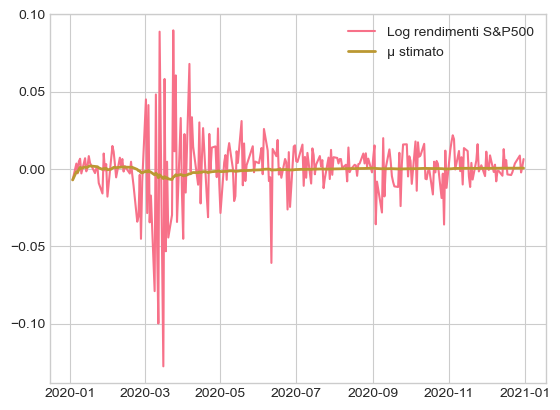

In [4]:
plt.plot(x, label='Log rendimenti S&P500')
plt.plot(x.index, x_filtering, label='μ stimato', linewidth=2)
plt.legend()

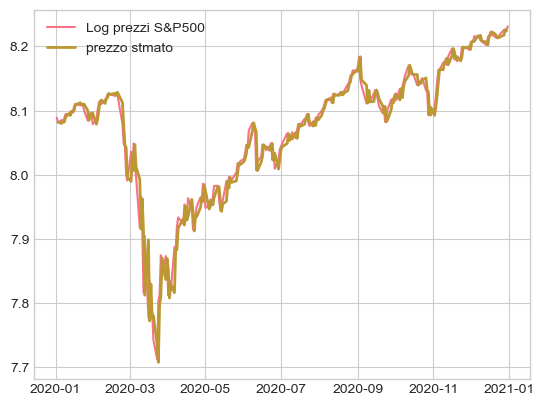

In [5]:
y_forecast = (y[:-1] + x_filtering).shift()

plt.plot(y, label='Log prezzi S&P500')
plt.plot(y_forecast, label='prezzo stmato', linewidth=2)
plt.legend()

### Confronto dei Modelli
La Figura 4.5 mostra l’effetto della previsione con il filtro di Kalman basato su tre modelli:

- Kalman sui log-rendimenti (drift dinamico $\mu_t$)
- Kalman sui log-prezzi (drift statico $\mu$)
- Kalman sui log-prezzi (drift dinamico $\mu_t$)

Le differenze sono minime. La Tabella 4.3 riporta l’**errore quadratico medio (MSE)** delle previsioni:

| Modello Kalman                        | MSE        |
|--------------------------------------|------------|
| Log-rendimenti (drift dinamico)      | 0.000632   |
| Log-prezzi (drift statico)           | 0.000560   |
| Log-prezzi (drift dinamico)          | 0.000557   |

Anche se le differenze sono piccole, i modelli più accurati offrono prestazioni migliori. Tuttavia, bisogna bilanciare **complessità** e **benefici pratici**. In generale, la modellizzazione con Kalman supera i modelli precedenti come MA, EWMA e ARMA.

### Kalman e ARMA

Il filtro di Kalman può essere applicato anche ai modelli ARMA (Sezione 4.3.3), riscrivendo il modello ARMA in forma di spazio degli stati. Ad esempio, un modello AR($p$):

$$
x_t = \phi_0 + \sum_{i=1}^{p} \phi_i x_{t-i} + \epsilon_t - \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
$$

può essere rappresentato definendo lo stato nascosto come:

$$
\alpha_t = \begin{bmatrix} x_t \\ \vdots \\ x_{t-p+1} \end{bmatrix}
$$

e quindi:

$$
x_t = \begin{bmatrix} 1 & 0 & \dots & 0 \end{bmatrix} \alpha_t \\
\alpha_{t+1} = \text{(matrice di transizione)} \cdot \alpha_t + \text{(rumore)}
$$

Questa rappresentazione consente di sfruttare la potenza del filtro di Kalman anche per modelli ARMA complessi.


## Modellazione della Volatilità/Varianza

La **clusterizzazione della volatilità** è un fatto stilizzato dei dati finanziari che si riferisce all'osservazione secondo cui grandi variazioni di prezzo tendono ad essere seguite da altre grandi variazioni (indipendentemente dal segno), mentre piccole variazioni tendono ad essere seguite da altre piccole variazioni (Fama, 1965; Mandelbrot, 1963). Questo fenomeno, evidenziato nell'analisi esplorativa dei dati nella Sezione 2.4 del Capitolo 2, rivela chiaramente una struttura temporale che può essere sfruttata attraverso una modellazione adeguata.

La Sezione 4.3 si è concentrata sull'utilizzo della struttura temporale per la modellazione della **media condizionale** o del **rendimento atteso condizionale** $\mu_t$ in (4.1), assumendo una varianza condizionale costante. Ora esploriamo una varietà di modelli per sfruttare la struttura temporale nella modellazione della **varianza condizionale** $\Sigma_t$.

A meno che non sia specificato diversamente, ci concentreremo sul **caso univariato** (singolo asset) per semplicità. L'obiettivo è calcolare l'**aspettativa della varianza futura** della serie temporale al tempo $t$ basandosi sulle osservazioni passate $F_{t-1}$, cioè:

$$
\text{Var}[\epsilon_t \mid F_{t-1}] = \mathbb{E}[\epsilon_t^2]
$$

dove $\epsilon_t = x_t - \mu_t$ è l'**errore di previsione** o **termine di innovazione**. In pratica, poiché la magnitudine di $\mu_t$ è molto più piccola rispetto ai dati osservati rumorosi $x_t$, si può anche considerare, per semplicità e con un effetto trascurabile sull'accuratezza:

$$
\mathbb{E}[x_t^2 \mid F_{t-1}]
$$

Si noti che la **volatilità non è una quantità direttamente osservabile** (sebbene si possano usare proxy significativi) e la definizione di una misura di errore richiede attenzione (Poon e Granger, 2003); in alternativa, anche un'ispezione visiva del risultato è di rilevanza pratica.

Il tema della **modellazione della volatilità o della varianza** è trattato in modo standard in molti testi (Lütkepohl, 2007; Ruppert e Matteson, 2015; Tsay, 2010), così come in alcuni articoli di revisione specifici (Bollerslev et al., 1992; Poon e Granger, 2003; Taylor, 1994).

## Media Mobile (MA)

Nel modello i.i.d. descritto in (3.1), il **residuo** è distribuito come:

$$
\epsilon_t \sim \mathcal{N}(0, \sigma^2)
$$

Il modo più semplice per stimare la sua **varianza** $\sigma^2 = \mathbb{E}[\epsilon_t^2]$ è calcolare la media dei valori al quadrato. Tuttavia, nella pratica, la **varianza** e la **volatilità** variano lentamente nel tempo, e vengono indicate rispettivamente come $\sigma_t^2$ e $\sigma_t$. Il termine *volatility envelope* si riferisce proprio alla **volatilità variabile nel tempo** $\sigma_t$.

Per consentire una varianza che varia lentamente nel tempo, possiamo utilizzare una **media mobile** o **media mobile su finestra scorrevole** (come nella Sezione 4.3.1) sui **residui al quadrato**:

$$
\begin{equation}
  \hat{\sigma}_t^2 = \frac{1}{q}\sum_{i=1}^q \epsilon_{t-i}^2.
\end{equation}
$$

Questa tecnica consente di catturare l'evoluzione della volatilità nel tempo in modo semplice e intuitivo.

![media mobile](./images/var-modeling-MA-1.png)



## EWMA (Media Mobile Ponderata Esponenzialmente)

Analogamente alla Sezione 4.3.2, possiamo attribuire **maggiore peso alle osservazioni più recenti**. Una delle opzioni è utilizzare **pesi esponenziali**, che possono essere calcolati in modo efficiente e ricorsivo come segue:

$$
\hat{\sigma}^2_t = \alpha \epsilon^2_{t-1} + (1 - \alpha) \hat{\sigma}^2_{t-1}
$$


Dove:
- $\alpha$ è il **parametro di decadimento esponenziale** o **memoria**, con $0 \leq \alpha \leq 1$.
- $\epsilon_{t-1}$ è il **residuo al tempo precedente**.
- $\hat{\sigma}^2_t$ è la **stima aggiornata della varianza** al tempo $t$.

La **Figura 4.7** mostra l'**inviluppo della volatilità** calcolato tramite EWMA con diverse memorie. Ogni volta che si verifica un **picco nei residui**, si può osservare il successivo **decadimento esponenziale** della volatilità.

![media mobile](./images/var-modeling-EMA-1.png)


## Modellazione GARCH

Il termine tecnico **eteroschedasticità** si riferisce al fenomeno di una **varianza che varia nel tempo**. Il modello **ARCH (Autoregressive Conditional Heteroskedasticity)** è uno dei primi modelli sviluppati per affrontare l'eteroschedasticità e, in particolare, il fenomeno della **clusterizzazione della volatilità**.

Il modello ARCH assume che la **varianza condizionale** al tempo $t$ dipenda dai **residui passati**, permettendo così di catturare la struttura temporale della volatilità osservata nei dati finanziari.

Il modello **GARCH (Generalized ARCH)** estende l'ARCH includendo anche la **varianza passata** nella stima, migliorando la capacità di modellare la volatilità persistente.

$$
\begin{equation}
  \begin{aligned}
  \epsilon_t &= \sigma_t z_t,\\
  \sigma_t^2 &= \omega + \sum_{i=1}^q \alpha_i \epsilon_{t-i}^2,
  \end{aligned}
\end{equation}
$$

Nel modello **ARCH(q)**:

- $\epsilon_t$ è il **termine di innovazione** da modellare.
- $z_t$ è una **variabile casuale i.i.d.** (indipendente e identicamente distribuita) con **media zero** e **varianza unitaria**.
- $\sigma_t$ rappresenta l’**inviluppo della volatilità** che varia lentamente nel tempo (espresso come media mobile dei residui al quadrato).
- I **parametri del modello** sono:
  - $\omega > 0$
  - $\alpha_1, \dots, \alpha_q \geq 0$

La **varianza condizionale** è modellata come:

$$
\sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2 + \dots + \alpha_q \epsilon_{t-q}^2
$$

Questo approccio consente di catturare la **dipendenza temporale nella volatilità**, rendendo il modello utile per analizzare serie temporali finanziarie con **clusterizzazione della volatilità**.

## Limitazioni del Modello ARCH

Una **limitazione importante** del modello ARCH è che **non riesce a catturare in modo persistente l’elevata volatilità**, a meno che l’ordine $q$ non sia scelto molto grande. Questo rende difficile modellare efficacemente il fenomeno della **clusterizzazione della volatilità**.

Questa limitazione può essere superata grazie al **modello GARCH (Generalized ARCH)**, proposto da **Bollerslev (1986)**. Il modello GARCH estende l’ARCH includendo anche la **varianza condizionale passata**, permettendo una **maggiore persistenza della volatilità** e una modellazione più realistica dei dati finanziari.


## Modello GARCH(p, q)

Il **modello GARCH lineare di ordini** $p$ e $q$, indicato come **GARCH(p, q)**, è stato proposto da **Bollerslev (1986)** come estensione del modello ARCH per affrontare la **persistenza della volatilità**.

La sua formulazione è la seguente:

$$
\epsilon_t = \sigma_t z_t,\quad z_t \sim \mathcal{N}(0,1)
$$

$$
\sigma_t^2 = \omega + \sum_{i=1}^{q} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{p} \beta_j \sigma_{t-j}^2
$$

Dove:
- $\epsilon_t$ è il **termine di innovazione**.
- $\sigma_t^2$ è la **varianza condizionale** al tempo $t$.
- $z_t$ è un **rumore bianco standardizzato**.
- $\omega > 0$, $\alpha_i \geq 0$ e $\beta_j \geq 0$ sono i **parametri del modello**.
- $q$ è l’ordine dei **termini ARCH** (residui passati al quadrato).
- $p$ è l’ordine dei **termini GARCH** (varianze condizionali passate).

Questo modello consente di catturare sia **shock improvvisi** (tramite i termini ARCH) sia **persistenza della volatilità** (tramite i termini GARCH), rendendolo uno strumento molto potente per l’analisi delle serie temporali finanziarie.

$$
\begin{equation}
  \begin{aligned}
  \epsilon_t &= \sigma_t z_t,\\
  \sigma_t^2 &= \omega + \sum_{i=1}^q \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^p \beta_j \sigma_{t-j}^2,
  \end{aligned}
\end{equation}
$$


Nel modello **GARCH(p, q)**:

- I **parametri** sono:
  - $\omega > 0$
  - $\alpha_1, \dots, \alpha_q \geq 0$
  - $\beta_1, \dots, \beta_p \geq 0$

Una **condizione tecnica** per garantire la **stazionarietà** del processo è:

$$
\sum_{i=1}^{q} \alpha_i + \sum_{j=1}^{p} \beta_j < 1
$$

Formalmente, il modello GARCH è un **modello ARMA** applicato a $\epsilon_t^2$. La **componente ricorsiva** in $\sigma_t$ consente alla **volatilità** di essere **più persistente nel tempo**, migliorando la capacità del modello di catturare la clusterizzazione della volatilità.

